In [1]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
edanonymous_pre = pd.read_csv('../../data/edanonymous_pre_features_tfidf_256.csv')
edanonymous_post = pd.read_csv('../../data/edanonymous_post_features_tfidf_256.csv')

In [3]:
edanonymous_pre.head()

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,EDAnonymous,doitliketweety,2019/05/14,How to suppress appetite 😫 Do you guys take an...,1.255708,3.918239,3.246580,83.586097,93.150943,4.159434,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,EDAnonymous,RecoveryForMyself,2019/05/14,DAE restrict really hard when not counting cal...,2.799608,4.762084,3.984902,86.678725,76.058824,5.709804,...,0.0,0.0,0.0,0.000000,0.18457,0.0,0.0,0.0,0.0,0.0
2,EDAnonymous,LilTricky420,2019/05/14,Skin and Bones by Cage the Elephant That’s it ...,-1.938810,-0.721478,-1.127143,111.455476,116.857143,1.866667,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,EDAnonymous,kimchiwitch,2019/05/14,"Im fucked Pregnant, bf hasnt touched me, needs...",4.844211,3.582493,4.655088,95.528947,69.175439,8.301754,...,0.0,0.0,0.0,0.197726,0.00000,0.0,0.0,0.0,0.0,0.0
4,EDAnonymous,laisserai,2019/05/14,Every time my mom yells I find myself seeking ...,1.965108,4.254279,3.368750,88.447404,80.250000,5.500962,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


## Features

The published paper, from which the dataset is cited, has an in depth breakdown of the features which can be found here: [https://www.jmir.org/2020/10/e22635/](https://www.jmir.org/2020/10/e22635/).  
The feature extractions are as follows:
- LIWC (n=62);
- sentiment analysis (n=4); 
- basic word and syllable counts (n=8); 
- punctuation (n=1); 
- readability metrics (n=9); 
- term frequency–inverse document frequency (TF-IDF) ngrams (256-1024) to capture words and phrases that characterize specific posts; 
- manually built lexicons about suicidality (n=1), economic stress (n=1), isolation (n=1), substance use (n=1), domestic stress (n=1), and guns (n=1). 

*A sidenote on TF-IDF:*  
The raw document (posts) has been converted to a matrix of TF-IDF features.
In the sklearn library, the TfidfVectorizer is equivalent to sklearn `countvectorizer` followed by `TfidfTransformer` where Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency.  
More can be read on [sklearn tfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) page.

## High level analysis

The question we are asking is *How has the substance use increased over the pandemic?*.   
For this project we have selected _one_ feature of interest: `substance_use_total`. In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

In [4]:
columns_of_interest = ['subreddit', 'author', 'date', 'post', 'substance_use_total']

edanonymous_pre = edanonymous_pre.loc[:, columns_of_interest]
edanonymous_post = edanonymous_post.loc[:, columns_of_interest]

In [5]:
edanonymous_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,EDAnonymous,doitliketweety,2019/05/14,How to suppress appetite 😫 Do you guys take an...,0
1,EDAnonymous,RecoveryForMyself,2019/05/14,DAE restrict really hard when not counting cal...,0
2,EDAnonymous,LilTricky420,2019/05/14,Skin and Bones by Cage the Elephant That’s it ...,0
3,EDAnonymous,kimchiwitch,2019/05/14,"Im fucked Pregnant, bf hasnt touched me, needs...",0
4,EDAnonymous,laisserai,2019/05/14,Every time my mom yells I find myself seeking ...,1


In [6]:
edanonymous_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6947 entries, 0 to 6946
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            6947 non-null   object
 1   author               6947 non-null   object
 2   date                 6947 non-null   object
 3   post                 6947 non-null   object
 4   substance_use_total  6947 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 271.5+ KB


In [7]:
edanonymous_post.head(5)

,subreddit,author,date,post,substance_use_total
0,EDAnonymous,undecoverpotato,2020/01/01,I got called fat today and I want to kill myse...,0
1,EDAnonymous,lauryleah,2020/01/01,there is no way i can stop a binge except fall...,0
2,EDAnonymous,isyoursexlifenormal,2020/01/01,Just ED Tingz Me : “look at this it’s the bigg...,0
3,EDAnonymous,squidman14,2020/01/01,Survived the holidays (barely) only to be trig...,0
4,EDAnonymous,bailsforreal,2020/01/01,Humiliating So I made a burner twitter to talk...,0


In [8]:
edanonymous_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            5042 non-null   object
 1   author               5042 non-null   object
 2   date                 5042 non-null   object
 3   post                 5042 non-null   object
 4   substance_use_total  5042 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 197.1+ KB


Comparing stats:

In [9]:
edanonymous_pre.describe()

,substance_use_total
count,6947.000000
mean,0.297826
std,0.756086
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


In [10]:
edanonymous_post.describe()

,substance_use_total
count,5042.000000
mean,0.262991
std,0.720278
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10.000000


Combining the pre and post into one dataset with a new feature column allows us to compare the data side by side

In [11]:
edanonymous_pre['period'] = 'pre'
edanonymous_post['period'] = 'post'

edanonymous_df = pd.concat([edanonymous_pre, edanonymous_post])
edanonymous_df

,subreddit,author,date,post,substance_use_total,period
0,EDAnonymous,doitliketweety,2019/05/14,How to suppress appetite 😫 Do you guys take an...,0,pre
1,EDAnonymous,RecoveryForMyself,2019/05/14,DAE restrict really hard when not counting cal...,0,pre
2,EDAnonymous,LilTricky420,2019/05/14,Skin and Bones by Cage the Elephant That’s it ...,0,pre
3,EDAnonymous,kimchiwitch,2019/05/14,"Im fucked Pregnant, bf hasnt touched me, needs...",0,pre
4,EDAnonymous,laisserai,2019/05/14,Every time my mom yells I find myself seeking ...,1,pre
...,...,...,...,...,...,...
5037,EDAnonymous,bigchinnychinchinboy,2020/04/20,"Shaming and judging myself, being triggered ov...",0,post
5038,EDAnonymous,pawesome-aw,2020/04/20,I love how if I say “I’m struggling” I get sco...,0,post
5039,EDAnonymous,mayneedadrink,2020/04/20,Beyond my control. What can you do when you ha...,0,post
5040,EDAnonymous,burnerphone413,2020/04/20,I fucking love greek yogurt I’ve been.. not qu...,1,post


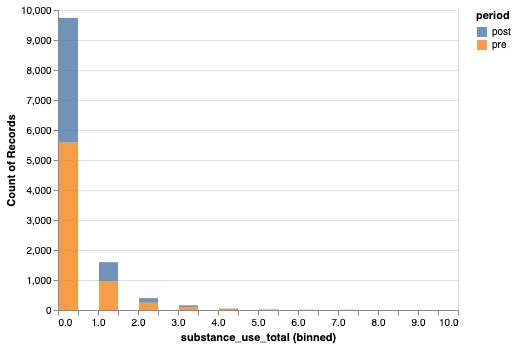

In [12]:
alt.Chart(edanonymous_df).mark_bar(opacity=0.8).encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='period'
)

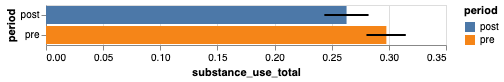

In [13]:
plot = alt.Chart(edanonymous_df).mark_bar().encode(
    x='mean(substance_use_total)',
    y='period',
    color='period'
)

err_bars = alt.Chart(edanonymous_df).mark_errorbar(extent='ci', rule=alt.LineConfig(size=2)).encode(
    x='substance_use_total',
    y='period')

plot + err_bars

In [14]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(edanonymous_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(edanonymous_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 6947
Number of unique authors (posters) in 'post' dataset: 5042


We have a roughly balanced data set of users posting before and after the pandemic.   
We see that the mean of `substance_use_total` was greater before the pandemic rather than after.